In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
df = pd.read_json('data/paper_term.json',lines=True)

In [4]:
df.sample(3)

,abstract,term,title,uuid
5573,The spectrum of the generator (Kolmogorov op...,"{' model ': 1, ' system ': 1, ' analysis ': 2,...",Ruelle-Pollicott Resonances of Stochastic Syst...,c8f753fc-88b6-11ea-b132-0242ac1a000b
2518,We explore the possible connections between ...,"{' dynamic ': 2, ' system ': 2, ' transition '...",On the Dynamic Qualitative Behaviour of Univer...,7632493e-8860-11ea-b132-0242ac1a000b
2411,The role of statisticians in society is to p...,"{' data ': 1, ' role ': 3, ' world ': 1, ' soc...",P-Values in a Post-Truth World,aee9bdb0-c0fb-11ea-afb9-0242ac1a0008


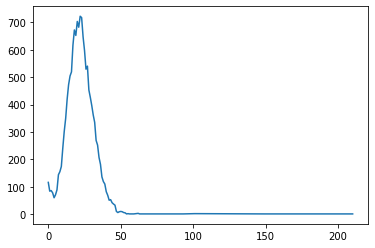

In [5]:
df['term_count'] = df['term'].apply(lambda x:len(x))

from collections import Counter
lyst = list(df['term_count'])
counts = dict(sorted(Counter(lyst).items(),key=lambda x:x[0]))

plt.plot(list(counts.keys()),list(counts.values()))

In [6]:
# 消除嵌套术语
def term_reduce(dic):
    rst = dic.copy()
    for k,v in dic.items():
        for k1,v1 in dic.items():
            if len(k.split()) < len(k1.split()):
                if k.strip() in k1:
                    rst[k] = rst[k] - v1
    rst = {k:v for k,v in rst.items() if v>0}
    return rst

In [7]:
%time df['term_reduce'] = df['term'].apply(lambda x:term_reduce(x))

Wall time: 6.49 s


In [8]:
paper2term = dict(zip(df['uuid'],df['term_reduce']))

In [10]:
### 摘要层级的共现网络
import json

with open('data/term_tuple_3.json','r') as f:
    terms = json.load(f)

In [20]:
filtered = [k for k in terms if terms[k][1]>=10]

[' model ',
 ' network ',
 ' data ',
 ' dynamic ',
 ' system ',
 ' time ',
 ' result ',
 ' graph ',
 ' information ',
 ' analysis ',
 ' paper ',
 ' approach ',
 ' algorithm ',
 ' number ',
 ' method ',
 ' structure ',
 ' problem ',
 ' framework ',
 ' distribution ',
 ' node ',
 ' study ',
 ' property ',
 ' behavior ',
 ' phase ',
 ' research ',
 ' theory ',
 ' state ',
 ' process ',
 ' performance ',
 ' interaction ',
 ' pattern ',
 ' function ',
 ' space ',
 ' agent ',
 ' population ',
 ' case ',
 ' feature ',
 ' parameter ',
 ' user ',
 ' energy ',
 ' evolution ',
 ' medium ',
 ' community ',
 ' prediction ',
 ' control ',
 ' effect ',
 ' set ',
 ' simulation ',
 ' power ',
 ' transition ',
 ' automaton ',
 ' rate ',
 ' individual ',
 ' science ',
 ' impact ',
 ' growth ',
 ' field ',
 ' measure ',
 ' diffusion ',
 ' role ',
 ' machine ',
 ' flow ',
 ' spread ',
 ' people ',
 ' influence ',
 ' term ',
 ' level ',
 ' disease ',
 ' probability ',
 ' cell ',
 ' activity ',
 ' strategy '

In [ ]:
# 每篇术语出现的论文
df_term['uuid'] = df_term['term'].apply(lambda x:[l for l in df2term if x in df2term[l]])

# 术语共现矩阵(摘要层级)
n = len(df_term)
co_cur_abstract = np.zeros((n,n))

for i,row in df_term.iterrows():
    set1 = set(row['uuid'])
    for j in range(i+1,n):
        set2 = set(df_term.loc[j,'uuid'])
        co_cur_abstract[i,j] = len(set1&set2)
        co_cur_abstract[j,i] = co_cur_abstract[i,j]
    if i%1000==0:
        print(i)
        
np.save('data/cocur_abstract.npy',co_cur_abstract)

### 筛选部分论文和术语 2021.01.01

In [10]:
df.sample()

,abstract,term,title,uuid,term_count,term_reduce
101,Causal interactions within complex systems can...,"{' information ': 1, ' state ': 2, ' space ': ...",Quantifying Causal Emergence Shows That Macro ...,898f4aca-e91a-11ea-b232-0242ac1a0005,23,"{' information ': 1, ' measure ': 2, ' brain '..."


In [11]:
lyst = [l[2] for l in terms.values()]

(array([1.000e+00, 1.400e+01, 1.025e+03, 7.148e+03, 2.943e+03, 1.034e+03,
        2.437e+03, 2.220e+02, 1.010e+02, 1.400e+01]),
 array([0.23373168, 0.30249601, 0.37126033, 0.44002466, 0.50878899,
        0.57755331, 0.64631764, 0.71508196, 0.78384629, 0.85261062,
        0.92137494]),
 <a list of 10 Patch objects>)

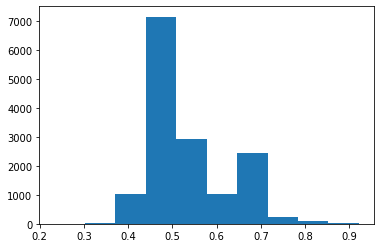

In [12]:
plt.hist(lyst)

In [51]:
# 删掉部分一般性术语   可以根据几何分布参数和出现过的论文篇数来调整
#(1) 几何分布参数大于0.85
del_terms = []
for k,v in terms.items():
    if v[2]>0.85:
        del_terms.append(k)
        print(k,v)
print('\n')        
#（2） 出现过的论文篇数大于1000
for k,v in terms.items():
    if v[1]>1000:
        del_terms.append(k)
        print(k,v)

 result  [6324, 3076, 0.8629008439]
 analysis  [5012, 1293, 0.8570705895]
 paper  [4180, 3241, 0.8903500626]
 structure  [4289, 680, 0.8515560773]
 property  [2701, 475, 0.8564466101]
 function  [2887, 521, 0.8588077040000001]
 term  [1536, 953, 0.8930071927000001]
 gap  [398, 163, 0.8552065990000001]
 aim  [438, 172, 0.9036636195000001]
 nature  [859, 386, 0.8812688093000001]
numerical simulation [477, 335, 0.9213749414]
case study [307, 185, 0.8654548375000001]
large number [300, 249, 0.9043175903]
real world [192, 77, 0.8588423618000001]
numerical experiment [112, 94, 0.8574090119000001]


 model  [17647, 2674, 0.6680431186]
 network  [20189, 1989, 0.5834253493]
 dynamic  [7387, 1324, 0.7640142064000001]
 system  [10781, 1562, 0.6856325257]
 time  [6105, 1440, 0.8086238801000001]
 result  [6324, 3076, 0.8629008439]
 analysis  [5012, 1293, 0.8570705895]
 paper  [4180, 3241, 0.8903500626]
 approach  [4973, 1164, 0.8254729325]
 number  [3916, 1445, 0.7734961371]
 method  [6660, 1566, 0

In [52]:
# 选取论文（使得论文中术语的数量不太少或太多）
mode = 0
for k,v in counts.items():
    if v == max(counts.values()):
        mode = k
print(f'出现{mode}个术语的论文数量最多')

df_demo = df[(df['term_count']>mode-5)&(df['term_count']<mode+5)].copy()
df_demo.shape

出现22个术语的论文数量最多


(5921, 6)

In [53]:
df_demo['term_reduce'] = df_demo['term_reduce'].apply(lambda x:[k for k in x if k not in del_terms])

In [54]:
df_demo.sample()

,abstract,term,title,uuid,term_count,term_reduce
13708,We consider the problem of a semiclassical d...,"{' approach ': 1, ' number ': 1, ' problem ': ...",Semiclassical treatment of quantum chaotic tra...,6b277328-e113-11ea-bad9-0242ac1a000a,19,"[ probability , quantum , transport , treat..."


In [63]:
# 用向量表示
term2id = {}
i = 0
for item in df_demo['term_reduce']:
    for l in item:
        if l not in term2id:
            term2id[l] = i
            i += 1

def one_hot(term_lyst,term2id):
    lyst = [term2id[l] for l in term_lyst]
    one_hot = np.zeros(len(term2id))
    for l in lyst:
        one_hot[l]=1
    return one_hot
        
%time df_demo['vector'] = df_demo.apply(lambda x:one_hot(x['term_reduce'],term2id),axis=1)

Wall time: 1.31 s


In [65]:
df_demo.sample(3)

,abstract,term,title,uuid,term_count,term_reduce,vector
5197,Quantifying lumbar back motion during functi...,"{' system ': 4, ' analysis ': 1, ' study ': 2,...",Measuring lumbar back motion during functional...,1bb17050-88b2-11ea-b132-0242ac1a000b,26,"[ research , motion , measurement , movemen...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2544,Adversarial formulations in machine learning...,"{' analysis ': 1, ' approach ': 1, ' method ':...",LEAD: Least-Action Dynamics for Min-Max Optimi...,33afa528-18db-11eb-a743-0242ac1a000c,20,"[ research , impact , type , convergence , ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
6078,We analyze an intermediate collective regime...,"{' phase ': 2, ' evolution ': 1, ' transition ...",From phase to amplitude oscillators,cf3326f4-88b3-11ea-b132-0242ac1a000b,26,"[ phase , evolution , transition , relation...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [66]:
df_demo.to_json('paper_with_term.json',orient='records',lines=True)

## 粗略按词性划分

In [ ]:
# 含有动词或者词根中含有动词的为1类。不含动词的为1类

In [6]:
df_candi = pd.read_json('data/df_candi.json',lines=True)

In [7]:
df_candi.sample(3)

,ave_infor,candi,estimation_reliabilities,freq,geometric_p,h_index,in_title_1,in_title_2,len,nhd,number_of_NN,occur_times,pmi,pos,spread_times
8242,-2.905079,small molecule,0.689758,17,0.447656,2,1.117762,0.117647,2,0.044271,0.500000,"[1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2]",0.986856,JJ NNS,"[0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1]"
8204,-2.378812,personalized recommendation,0.569770,19,0.465010,2,2.577931,0.052632,2,0.195876,0.500000,"[1, 1, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1]",0.998945,JJ NNS,"[0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
15472,-2.358385,liquid-liquid phase separation,0.666247,11,0.444024,2,2.117148,0.363636,3,0.578947,0.666667,"[1, 1, 1, 1, 2, 2, 1, 1, 1]",1.000000,JJ NN NN,"[0, 0, 0, 0, 1, 1, 0, 0, 0]"


In [12]:
df1 = df_candi[df_candi['candi'].isin(terms)]

In [14]:
term2pos = dict(zip(df1['candi'],df1['pos']))

In [29]:
dic1 = {k:v for k,v in term2pos.items() if 'V' in v}
dic2 = {k:v for k,v in term2pos.items() if k not in dic1}
dic2 = {k:v for k,v in dic2.items() if len(k.split())>1}

In [34]:
print(len(dic1),len(dic2))

196 5890


In [33]:
dic2

{'cellular automaton': 'JJ NN',
 'machine learning': 'NN NN',
 'social network': 'JJ NNS',
 'neural network': 'JJ NNS',
 'time series': 'NN NN',
 'complex network': 'JJ NNS',
 'deep learning': 'JJ NN',
 'COVID-19 pandemic': 'NNP NN',
 'reinforcement learning': 'NN NN',
 'social distancing': 'JJ NN',
 'link prediction': 'NN NN',
 'numerical simulation': 'JJ NNS',
 'phase transition': 'NN NN',
 'monte carlo': 'NN NN',
 'fake news': 'JJ NN',
 'united state': 'JJ NNS',
 'et al': 'NN NN',
 'power law': 'NN NN',
 'phase space': 'NN NN',
 'data set': 'NNS NNS',
 'differential equation': 'JJ NNS',
 'public health': 'JJ NN',
 'network science': 'NN NN',
 'real-world network': 'JJ NNS',
 'real world': 'JJ NN',
 'opinion dynamic': 'NN NNS',
 'initial condition': 'JJ NNS',
 'decision making': 'NN NN',
 'contact tracing': 'NN NN',
 'kuramoto model': 'NN NN',
 'climate change': 'NN NN',
 'temporal network': 'JJ NNS',
 'statistical physic': 'JJ NNS',
 'mean field': 'JJ NN',
 'mathematical model': 'JJ

In [24]:
dic1

{'network embedding': 'NN VBG',
 'representation learning': 'NN VBG',
 'clustering coefficient': 'VBG NN',
 'embedding method': 'VBG NNS',
 'ising model': 'VBG NN',
 'node embedding': 'NN VBG',
 'reservoir computing': 'NN VBG',
 'spanning tree': 'VBG NNS',
 'message passing': 'NN VBG',
 'graph clustering': 'NN VBG',
 'labeled data': 'VBN NNS',
 'modeling approach': 'VBG NN',
 'governing equation': 'VBG NNS',
 'embedding space': 'VBG NN',
 'neighboring node': 'VBG NNS',
 'embedding technique': 'VBG NNS',
 'tipping point': 'VBG NNS',
 'word embedding': 'NN VBG',
 'embedding vector': 'VBG NNS',
 'information spreading': 'NN VBG',
 'spiking neuron': 'VBG NNS',
 'conduct experiment': 'VBP NNS',
 'coupling function': 'VBG NNS',
 'dominating set': 'NN VBN',
 'reported case': 'VBN NNS',
 'turing machine': 'VBG NNS',
 'face covering': 'NN VBG',
 'connected graph': 'VBN NN',
 'kicked rotor': 'VBD NN',
 'extract information': 'VB NN',
 'period doubling': 'NN VBG',
 'firing rate': 'VBG NN',
 'gene

In [37]:
import nltk
from nltk.stem import PorterStemmer

In [32]:
stemmer = PorterStemmer()
print(stemmer.stem('linked prediction'))

linked predict


In [47]:
dic3 ={}
for k,v in dic2.copy().items():
    temp = [stemmer.stem(l) for l in k.split()]
    temp_pos = nltk.pos_tag(temp)
    temp_pos = ' '.join([l[1] for l in temp_pos])
    if 'V' in temp_pos:
        dic2.pop(k)
        dic3[k] = v

In [44]:
dic1.update(dic3)

In [46]:
# 第一类词
list(dic1.keys())

['network embedding',
 'representation learning',
 'clustering coefficient',
 'embedding method',
 'ising model',
 'node embedding',
 'reservoir computing',
 'spanning tree',
 'message passing',
 'graph clustering',
 'labeled data',
 'modeling approach',
 'governing equation',
 'embedding space',
 'neighboring node',
 'embedding technique',
 'tipping point',
 'word embedding',
 'embedding vector',
 'information spreading',
 'spiking neuron',
 'conduct experiment',
 'coupling function',
 'dominating set',
 'reported case',
 'turing machine',
 'face covering',
 'connected graph',
 'kicked rotor',
 'extract information',
 'period doubling',
 'firing rate',
 'generating function',
 'training set',
 'synchronized flow',
 'phase locking',
 'coarse graining',
 'organizing principle',
 'wavefront shaping',
 'embedding approach',
 'wave turbulence',
 'turning point',
 'structured illumination',
 'seed set',
 'mixing pattern',
 'gradient boosting',
 'particle tracking',
 'importance sampling',
 

In [49]:
# 第二类词
list(dic2.keys())

['cellular automaton',
 'machine learning',
 'social network',
 'neural network',
 'time series',
 'complex network',
 'deep learning',
 'COVID-19 pandemic',
 'reinforcement learning',
 'social distancing',
 'link prediction',
 'numerical simulation',
 'phase transition',
 'monte carlo',
 'fake news',
 'united state',
 'et al',
 'power law',
 'phase space',
 'data set',
 'public health',
 'network science',
 'real-world network',
 'real world',
 'opinion dynamic',
 'initial condition',
 'contact tracing',
 'kuramoto model',
 'climate change',
 'temporal network',
 'statistical physic',
 'mean field',
 'mathematical model',
 'scale-free network',
 'artificial intelligence',
 'influence maximization',
 'multiplex network',
 'degree distribution',
 'traffic flow',
 'molecular dynamic',
 'parameter space',
 'social influence',
 'real network',
 'growth rate',
 'multilayer network',
 'agent-based model',
 'reproduction number',
 'node classification',
 'time evolution',
 'nonlinear dynamic'

In [51]:
len(dic1),len(dic2)

(387, 5699)